 # The standard static labour supply model

In this model project we present and solve the standard static labour supply model.

In this standard static labour supply model an individual faces exogenous deterministic wage and non-labor income. The individual get utility from both enjoying leisure and consumption, but have to work and earn wages to be able to consume and to enjoy leisure. This means that the model is a standard maximisation problem, where the individual wishes to maximise utility subject to his/her budget constrain. This maximisation problem is solved in three ways; thoerically, analytically and numerically. For the numerical optimisation, the chosen algorithm  is a sequential (least-squares) quadratic programming (SQP) algorithm (SLSQP). Beside the simple model, we also extend the model in two ways by including a proportional income tax and a progressive income tax. 

In part 1, we introduce the standard model and solve it theoretical, analytically and by using numerical optimasation in python. In part 2 we add a proportional tax to the standard model and solve the model by using numerical optimasation. In part 3, we add a progressive tax and again solve the model by using numerical optimasation.

## The model

### The general assumptions

The agent only get utility from enjoying leisure and consumption

The utility function is a standard quasiconcave and monotone utility function: $U(C,L)$ with $U'_C>0$ and $U'_L>0$

The individual earn W per hour and the price of the consumption good is P. This means that the real wage can be denoted by $w = W/P$

(The individual has non-labor income $\tilde{R}$, which in real terms will be expressed by $R = \tilde{R}/P$)

### The utility function

For simplicity we assume that the utility function has the specific form $$U(C,L)=C^{1/3} L^{2/3}$$

### The budget constraint

The agent has $L_0$ hours available for consumption, $C$, and leisure, $L$. Hours spend on leisure is hours spend not working, i.e. hours worked is given by $h = L_0 - L$. 

The budget constraint is given by $$C \leq wh+R \implies C \leq w(L_0 - L) + R$$

### The agents maximization problem

The agent wishes to maximize $$max_{C,L} U(C,L)=C^{1/3} L^{2/3}$$ subject to $$C \leq w(L_0 - L) + R$$

For simplicity we assume that total hours available ($L_0$) is 24 hours (i.e. we assume that leisure include all activities besides working).



Since we are only interested in an interior solution we can replace the greater and equal sign with an equality $$C=w(24-L) + R$$

## Solving the model theoretically

To solve the model theoretically we set up the Lagrange function $$\mathcal{L}(C,L,\mu)=C^{1/3} L^{2/3}+\mu(w(24-L) + R - C)$$

The first order conditions are given by $$\frac{\partial \mathcal{L}}{\partial C} = \frac{1}{3} C^{-2/3} L^{2/3}-\mu \implies \mu=\frac{1}{3} C^{-2/3} L^{2/3}$$ $$\frac{\partial \mathcal{L}}{\partial L} = \frac{2}{3} C^{1/3} L^{-1/3}-\mu w \implies \mu=\frac{2 C^{1/3} L^{-1/3}}{3w}$$ $$\frac{\partial \mathcal{L}}{\partial \mu} = w(24-L)+R$$

Equating the first two first order conditions yields $$\frac{C^{-2/3} L^{2/3}}{3} =\frac{2 C^{1/3} L^{-1/3}}{3w}  \implies C^{-2/3} L^{2/3} =\frac{2 C^{1/3} L^{-1/3}}{w} \implies L=\frac{2C}{w}$$

Inserting the expression for L into the third first order condition yields $$C=w(24-\frac{2C}{w})+R \implies C=24w-2C+R \implies 3C=24w+R \implies C=\frac{24w+R}{3}$$ 

Inserting the expression for C into the expression for L $$L = \frac{2\frac{24w+R}{3}}{w}=\frac{48w+2R}{3w}$$

This means that the optimal level of C and L is given by $$(C^*,L^*)=(\frac{24w+R}{3},\frac{48w+2R}{3w})$$

## Solving the model using Python

In [35]:
# Import libraries
from scipy import optimize,arange
import numpy as np
import ipywidgets as widgets
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd

# For pretty printing
sm.init_printing(use_unicode=True)

### Analytically

Defining symbols

In [36]:
C = sm.symbols('C') 
L = sm.symbols('L')
R = sm.symbols('R')
W = sm.symbols('W')

Defining objective function (utility function) and budget constraint:

In [48]:
objective = C**(1/3)*L**(2/3)
#objective

In [49]:
budget_constraint= sm.Eq(W*(24-L) + R,C)
#budget_constraint

Solving in **four steps**:

1. **Isolate** $L$ from the budget constraint
2. **Substitute** in $L$
3. **Take the derivative** wrt. $C$
4. **Solve the FOC** for $C$

**Step 1: Isolate**

In [50]:
L_from_con = sm.solve(budget_constraint,L)
#L_from_con

**Step 2: Substitute**

In [51]:
objective_subs = objective.subs(L,L_from_con[0])
#objective_subs

**Step 3: Take the derivative**

In [52]:
foc_C = sm.diff(objective_subs,C)
#foc_C

**Step 3: Solve the FOC**

In [53]:
sol_C = sm.solve(sm.Eq(foc_C,0),C)
#sol_C

Hence, from the theoretical solution we had: $C^* = (1/3)(48W+2R)$ which equals the obtained solution here. 

Substituting $C^*$ into the expression for L obtained in step 1 yields $L^*$:

In [54]:
L_star = L_from_con[0].subs(C,sol_C[0])
L_star

Hence, from the theoretical solution we had: $L^* = \frac{48w+2R}{3w} = 16+\frac{2R}{3w}$ which equals the obtained solution here. 

### Numerically

Most estimators require the optimisation (maximisation or minimisation) of some objective function. However, in most cases optimisation problems are too complicated to be solved analytically and therefore we can use numerical optimisation. 

Numerical optimisation requires the use of an algorithm. The definition of an algorithm is an iterative process that generates a series $x_0,x_1,...,x_n$ that converges to the local minimum (or maximum) $\hat{x}$. It is defined by a starting point $x_0$ (initial guess), an iterative formula (how to move from $x_n$ to $x_n+1$) and a stopping rule.

The iterative formula is the centrepiece of an algorithm as it states how the iterative method update the current estimate of x. 

In this project, the chosen algorithm for the numerical optimisation is called a sequential (least-squares) quadratic programming (SQP) algorithm (SLSQP). The algorith works well for constrained nonlinear optimization. The drawback is that it is not as efficient as e.g. the BFGS optimisation method. The reason why we use the SLSQP anyway, is due to the extention later on in the project where we have a non-linear budget constraint, and for consistency we have chosen this algorithm for all part of this project.

We start by define the utility function and the budget constraint as python variables. Further, we also specify a variable for R and W.

In [59]:
def _utility(C,L):
    return -(C**(1/3)*L**(2/3))

def utility(x):
    return _utility(x[0],x[1])

def eq_constraint(x):
    return w*(24-x[1]) + R - x[0]

R = 200
w = 150

We have added a minus in front of the utility function above, since we are using scipy.optimize to maximize utility subject to the budget constraint. However, scipy.optimize does only have a minimization attribute, which is the reason we have added a minus in front of the utility function. Further, x[0] correspond to C and x[1] correspond to L. 

In [60]:
# a. setup
eq_con = {'type': 'eq', 'fun': eq_constraint} 

# b. call optimizer
x0 = (5,5)
result = optimize.minimize(utility,x0,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con,
                             options={'disp':True})

print('\nx = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -71.22320284362137
            Iterations: 16
            Function evaluations: 64
            Gradient evaluations: 16

x =  [1266.68584511   16.88876103]


The numerically solution of the standard static labour supply model is that the agent uses 1266.69 on consumption and 16.89 hours on leisure. 

We see that the optimal level of consumption and labour is the same as in the theoretical solution if we plot in $R=200$ and $w=150$

The effect of changing the wage (and keeping non-labour income constant) on the optimal bundle of consumption level and hours of leisure is shown in the two graphs below. The left figure shows that the wage level has to decrease quite a lot (from 300 to below 100) before the agent start to enjoy substantially more leisure, whereas the right figure shows that consumption increases linearly with the wage level.

In [102]:
ws = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

# Choice of L given w
L = 5
result_L = []

for w in ws:
    uL = lambda L: -((w*(24-L)+R)**(1/3)*L**(2/3))
    result = optimize.minimize(uL,L,method='SLSQP',bounds=None)
    result_L.append((result.x[0]))

# Choice of C given w 
C = 5
result_C = []

for w in ws:
    uC = lambda C: -(C**(1/3)*(24+(R-C)/w)**(2/3))
    result = optimize.minimize(uC,C,method='SLSQP',bounds=None)
    result_C.append((result.x[0]))

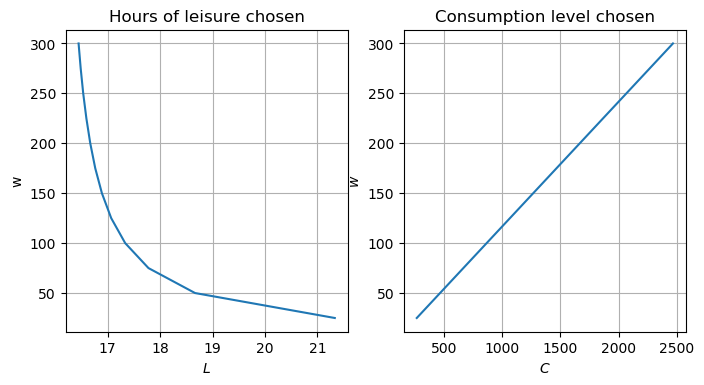

In [103]:
# The figure size
fig = plt.figure(figsize=(8,4),dpi=100) 

# left plot - choice of L given w
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(result_L,ws)

ax_left.set_title('Hours of leisure chosen')
ax_left.set_xlabel('$L$')
ax_left.set_ylabel('w')
ax_left.grid(True)

# right plot - choice of C given w
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(result_C,ws)

ax_right.set_title('Consumption level chosen')
ax_right.set_xlabel('$C$')
ax_right.set_ylabel('$w$')
ax_right.grid(True)

# The standard model with proportional income taxation

## The model

Inserting a proportional tax in the stardard model means that all workers have to pay a tax for each dollar earned. This can both affect the hours worked and the labor force participation. 

### The budget constraint

The budget constraint is now given by
$$C=(1-\tau)w(24-L) + R$$
This means that you have to pay a certain level of income tax for your whole wage. The more you work, the more taxes you have to pay.

## Solving the model numerically in Python

In [71]:
def _utility2(C,L):
    return -(C**(1/3)*L**(2/3))

def utility2(x):
    return _utility2(x[0],x[1])

def eq_constraint2(x):
    return (1-tau)*w2*(24-x[1]) + R2 - x[0]

R2 = 200
w2 = 150
tau = 0.3

In [70]:
# a. setup
eq_con2 = {'type': 'eq', 'fun': eq_constraint2} 

# b. call optimizer
x0 = (5,5)
result = optimize.minimize(utility2,x0,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con2,
                             options={'disp':True})

print('\nx = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -64.66581865340618
            Iterations: 15
            Function evaluations: 60
            Gradient evaluations: 15

x =  [906.61365183  17.27034617]


The numerically solution of the model with proportional tax  is that the agent uses 906.61 on consumption and 17.27 hours on leisure. When including a proportional tax, we see that the agent work less meaning the agent has less money for consumption but more time for leisure.

# The standard model with progressive income taxation

## The model

Incerting a progressive tax in the stardard model gives us as non-linear budget constraint meaning the tax system in non-linear with varying tax rates. In this case you pay zero tax up to a certain income level and thereafter you pay a certain tax for the rest of your income.

### The budget constraint

The budget constraint is now given by
\\[
\begin{eqnarray*}
C&=&\begin{cases}
(1-\tau) w (24-L) + R + w \tau (24 - L_{min}) & \text{for }L \leq L_{min}\\
w (24 - L) +R & \text{for }L \geq L_{min} 
\end{cases}\\
\end{eqnarray*}
\\]

This means that if your hours of leisure is below a certain minimum you have to pay income tax. In other words, if you work more hours than a certain minimum your income is taxed. If you work below the certain minimum your budget constraint is as in the standard model.

## Solving the model numerically using Python

In [93]:
def _utility3(C,L):
    return -(C**(1/3)*L**(2/3))

def utility3(x):
    return _utility3(x[0],x[1])

def con(x):
    if x[1] <= 18:
        con = (1-tau2)*w3*(24-x[1]) + R3 + w3*tau2*19 - x[0]
    else:
        con = w3*(24-x[1]) + R - x[0]
    return con

R3 = 200
w3 = 150
tau2 = 0.6

The numerical solution of the model with progressive tax is that the agent uses 1099.99 on consumption and 18.00 hours on leisure. Compared to the basic model, we see that the agent work less and earning less meaning the agent has less money for consumption but more time for leisure. Compared to the model including a proportional tax the agent work less but earn more as the agent only pay taxes for some of the income meaning the agent has more money for cuncumption and more time for leisure. 

# Summing up

In this project, we used the the standard static labour supply model. In the first part, the model is presented and the set up explained. The model is solved theoretically and analytically, where the solutions are shown to be the same. Thereafter, the model is solved by using numerical optimisation and the chosen algorithm  is called a sequential (least-squares) quadratic programming (SQP) algorithm (SLSQP). We choose this algorithm as one of our extensions includes a non-linear constraint. The results are that C = 1266.69 and L = 16.89. Further, we visualize the results for different values of the wage rate. In the second part, we extended the model by including a proportional income tax. The results are that C = 906.61 and L = 17.27. In the third part, we extended the model by including a progressive income tax, and the results are that C = 1099.99 and L = 18.00.